# cv2. dft(src [、dst [、flags [、nonzeroRows]]]) 
### 概要
がんばリーリエ　がんばフーリエ

2次元離散フーリエ変換を行う関数です

### 要点

・フーリエ変換とは信号を**周波数へ変換**する処理

・2次元のフーリエ変換というと、画像を空間周波数へ変換するということ。

・画像は縦横の二次元であるため。音声などをフーリエ変換する時は時間軸に対してのため、1次元フーリエ変換ということになる

・フーリエ変換後の振幅スペクタルの見方として
　1,中央ほど低周波数　周囲に引くほど講習数
   2,明るいところほど周波数成分が多い　

・2次元離散フーリエ変換をする時は、numpyのfft.fft2()の方が使いやすいため、**ぶっちゃけるとあまり使わない**。

・入力画像はグレースケール画像でなければならない

・cv2.dft()関数は周波数領域の原点が画像の左上の角に位置するため、スペクタルとして見やすくするためにnp.fft.fftshift(dft)関数を使って、成分を画像中心にする。

・処理速度はnp.fft.fft2より早い






### 引数(公式リファレンスから引用)
**src**	        入力画像。グレースケール 画像かつnp.float32型に変換する必要があり

**flag**     	変換フラグ 変換フラグの詳細は下記


#####  変換フラグ一覧
**DFT_INVERSE** デフォルトの順変換の代わりに，1次元あるいは2次元の逆変換を行います．

**DFT_SCALE** 結果を配列の要素数で割ってスケーリングを行います．通常，これは DFT_INVERSE と一緒に利用されます．

**DFT_ROWS** 入力行列の各行に対して，順変換あるいは逆変換を行います．このフラグによって，ユーザは複数のベクトルを同時に変換することができます．また，（処理時間の何倍もかかることがある）オーバーヘッドを減らしたり，3次元以上の変換を行うために利用することもできます．

**DFT_COMPLEX_OUTPUT** 実数の1次元配列または2次元配列の順変換を行う場合，その結果は複素配列となりますが，これは複素共役対称（ CCS ）です．以下の説明を参照してください．入力配列と同サイズの実数配列にパックされた配列を作ることは，最速の選択であり，関数のデフォルトの動作でもあります．しかし，（簡易スペクトル分析などの為に）正確な複素配列を得たい場合もあるかもしれません．このフラグを渡すことで，正確なサイズの複素配列を出力するようにできます．

**DFT_REAL_OUTPUT** 実数の1次元配列または2次元配列の逆変換を行う場合，その結果は通常，同じサイズの複素配列となります．しかし，入力配列が複素共役対称である場合（例えば， DFT_COMPLEX_OUTPUT フラグを指定した順変換の結果）は，出力は実数配列になります．この関数自身は入力が対称かそうでないかをチェックしませんが，このフラグを渡すことで，対称性を仮定して実数配列を作成します．入力配列がパックされた実数配列で，その逆変換が実行される場合，この関数は入力をパックされた複素共役対称配列として扱うので，出力も実数配列となることに注意してください．
[変換フラグ参考サイト](http://opencv.jp/opencv-2svn/cpp/operations_on_arrays.html)



### 戻り値
**dst**    周波数領域の情報 


### 参考URL
[公式ドキュメント](https://docs.opencv.org/master/d2/de8/group__core__array.html#gadd6cf9baf2b8b704a11b5f04aaf4f39d)
[参考サイト1](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)
[参考サイト2](https://qiita.com/ProgramWataru/items/34e52fae74bfc0532f80)
[参考サイト3](https://blog.amedama.jp/entry/image-fourier-transform)

In [2]:
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dft_shape (496, 271, 2)


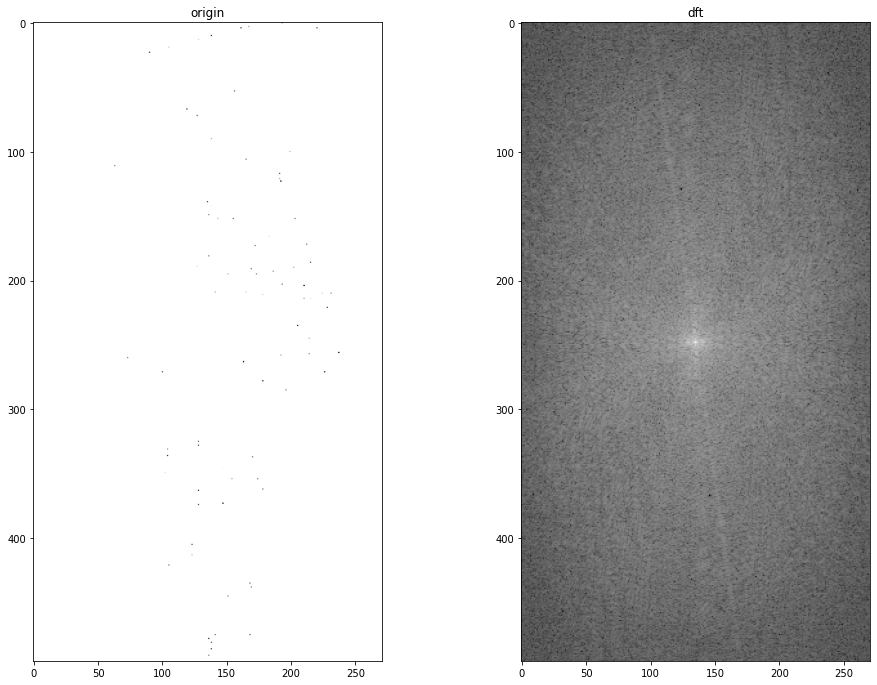

In [8]:
img  = cv2.imread("../img/ririe.png",0)
plt.rcParams['figure.figsize'] = (15 ,15)  #pltのサイズを変更
plt.subplots_adjust(wspace=0.4, hspace=0.6)


def main():
    
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    print("dft_shape",dft.shape)
    # 画像の中心に低周波数の成分がくるように並べかえる
    dft_shift = np.fft.fftshift(dft) 
    # パワースペクトルに変換する
    magnitude_spectrum = 20 *  np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    
    #元画像
    plt.subplot(1,2,1)
    plt.title("origin") 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #フーリエ変換
    plt.subplot(1,2,2)
    plt.title("dft")
    plt.imshow(magnitude_spectrum,cmap= "gray")
    
    
    plt.show()
    
main()